In [1]:
%matplotlib inline
import csv, random
from numpy import genfromtxt
import sys
import numpy as np
import numpy.random as rnd
import time
import gpflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import GPy
from sklearn.metrics import mean_squared_error

/Applications/anaconda3/lib/python3.6/site-packages/multipledispatch/dispatcher.py:24: AmbiguityWarning: 
Ambiguities exist in dispatched function _expectation

The following signatures may result in ambiguous behavior:
	[Gaussian, Identity, NoneType, Kernel, InducingPoints], [Gaussian, Linear, NoneType, Sum, InducingPoints]


Consider making the following additions:

@dispatch(Gaussian, Identity, NoneType, Sum, InducingPoints)
def _expectation(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)


In [2]:
import pandas as pd
data_train = pd.read_csv("train_boston.csv",header=None)
data_test = pd.read_csv("test_boston.csv",header=None)

In [3]:
data_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,19.1,1.535500,-0.48820,1.104500,-0.30101,0.272810,-0.535510,0.110950,-0.473680,1.71870,1.617100,0.860320,0.122050,0.765380
1,20.5,-0.408940,0.44063,-0.722830,-0.30101,-0.994430,-0.101180,0.403670,1.943200,-0.26128,-0.410350,0.329750,0.204630,-0.341090
2,23.4,-0.409090,-0.48820,0.016179,-0.30101,-1.147500,-0.073676,-2.202300,0.643340,-0.61070,-0.561200,0.377990,0.216130,-0.702980
3,20.0,-0.421470,-0.48820,-0.707900,-0.30101,-0.416090,-0.658560,-0.231750,-0.253230,-0.49423,-0.718080,0.377990,0.220480,-0.166380
4,23.9,-0.426110,-0.48820,0.183390,-0.30101,0.213280,0.984620,0.824900,-0.821580,-0.96011,-0.754290,1.246200,0.436300,-0.966420
5,23.8,-0.412600,-0.48820,-0.495900,-0.30101,-0.467120,0.188370,-0.556600,0.292630,-0.49423,-0.669810,0.570920,0.436300,-0.750120
6,33.0,-0.431320,0.25065,-1.391700,-0.30101,-1.121200,1.169900,-0.299580,2.491300,-0.72717,-1.098200,0.088588,0.395460,-0.632260
7,22.6,0.104980,-0.48820,1.104500,-0.30101,1.888800,-0.266230,0.478640,-0.661180,1.71870,1.617100,0.860320,0.367560,0.008324
8,20.4,-0.417280,-0.48820,-0.103260,-0.30101,-0.007853,-0.613680,0.185910,-0.676020,-0.37775,0.205110,-0.297280,-0.213960,0.382690
9,13.3,0.808220,-0.48820,1.104500,-0.30101,1.046800,0.721140,1.103300,-1.201700,1.71870,1.617100,0.860320,0.436300,1.196600


In [4]:
Ytrain = data_train.drop(data_train.columns[1:], axis=1)
Xtrain = data_train.drop(data_train.columns[0], axis=1)
Ytest = data_test.drop(data_test.columns[1:], axis=1)
Xtest = data_test.drop(data_test.columns[0], axis=1)

In [5]:
X_train = Xtrain.values.astype(np.float)
Y_train = Ytrain.values.astype(np.float)
X_test = Xtest.values.astype(np.float)
Y_test = Ytest.values.astype(np.float)

In [6]:
#Normalise 
ymean_train = Y_train.mean()
Y_train_norm = Y_train-ymean_train
ymean_test = Y_test.mean()
Y_test_norm = Y_test-ymean_test

In [7]:
#Plotting evaluation metric
opt_time = []
nlpd_mean = []
nlpd_std = []
nrmse = []
M_change = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

In [8]:
#All the predefined function
def init():
    kern = gpflow.kernels.RBF(X_train.shape[1],1)
    from scipy.cluster.vq import kmeans
    Z = kmeans(X_train, M)[0]
    m = gpflow.models.SVGP(X_train, Y_train_norm, kern, gpflow.likelihoods.Gaussian(), Z, minibatch_size=len(X_train))
    return m

class Logger(gpflow.actions.Action):
    def __init__(self, model):
        self.model = model
        self.logf = []
        
    def run(self, ctx):
        if (ctx.iteration % 10) == 0:
            likelihood = - ctx.session.run(self.model.likelihood_tensor)
            self.logf.append(likelihood)
            
def run_opt (model, iterations,var_list=None):
    if var_list is None:
        var_list = [(model.q_mu, model.q_sqrt)]
    model.q_mu.set_trainable(False)
    model.q_sqrt.set_trainable(False)
    adam = gpflow.train.AdamOptimizer().make_optimize_action(model) 
    model.q_mu.set_trainable(True)
    model.q_sqrt.set_trainable(True)
    natgrad=gpflow.training.NatGradOptimizer(1).make_optimize_action(model,var_list = var_list)
    logger = Logger(model)
    actions = [adam,natgrad,logger]
    loop = gpflow.actions.Loop(actions, stop=iterations)()
    model.anchor(model.enquire_session())
    return logger

In [ ]:
M = 5
m = init()
m.X.set_batch_size(100)
m.Y.set_batch_size(100)
m.feature.trainable = False
start_time = time.time()
logger = run_opt(m, gpflow.test_util.notebook_niter(20000), var_list=[(m.q_mu, m.q_sqrt)])
opt_time.append(time.time() - start_time)

In [ ]:
#Plotting for optimization algorithm
plt.plot(-np.array(logger.logf))
plt.xlabel('iteration')
plt.ylabel('ELBO')

In [ ]:
#Plotting for optimization algorithm
plt.plot(-np.array(logger.logf))
plt.xlabel('iteration')
plt.ylabel('ELBO')

In [9]:
#Algorithm
for i in M_change:
    #Fitting model
    M = i
    m = init()
    m.X.set_batch_size(100)
    m.Y.set_batch_size(100)
    
    #Optimization process
    m.feature.trainable = False
    start_time = time.time()
    logger = run_opt(m, gpflow.test_util.notebook_niter(16000), var_list=[(m.q_mu, m.q_sqrt)])
    opt_time.append(time.time() - start_time)
    
    #NMSE calculation
    rmse = np.sqrt(mean_squared_error(Y_test_norm,m.predict_y(X_test)[0]))
    nrmse.append(rmse/(m.predict_y(X_test)[0].max()-m.predict_y(X_test)[0].min()))
    
    #Negative log probability density
    nlpd_mean.append(-m.predict_density(X_test,m.predict_y(X_test)[0]).mean())
    nlpd_std.append(np.std(m.predict_density(X_test,m.predict_y(X_test)[0])))
    

In [10]:
nrmse

[0.21832999973569267,
 0.2136041668869999,
 0.20761396301339244,
 0.20916796773306584,
 0.20905730006277259,
 0.19051513566160952,
 0.1738308975425929,
 0.17405143846537249,
 0.16574460475539088,
 0.16812626391490954,
 0.16591466250285786,
 0.16045202931244143,
 0.16142325311259759,
 0.15209742402199516,
 0.15983630951669514,
 0.15136818789957143,
 0.14909419835567056,
 0.15873747049194864,
 0.15277421401472849,
 0.14996387728575775]

In [11]:
nlpd_mean

[2.1130787267890652,
 2.1035202168805158,
 2.0948320707638746,
 2.090512764374298,
 2.0936756050794862,
 2.0897095857726482,
 2.0843160408015673,
 2.0871815476492688,
 2.0864931429379543,
 2.0832534105766753,
 2.0876917455391633,
 2.0921176944705104,
 2.0850170239413006,
 2.0852886341229135,
 2.0917442560857409,
 2.0885344411930911,
 2.0856538946264926,
 2.0905724303386153,
 2.0881700665002754,
 2.0899713022585011]

In [12]:
nlpd_std

[0.032672527186657058,
 0.027336561622008166,
 0.028031995490467615,
 0.024762396536569305,
 0.026861823707821128,
 0.031494946339667547,
 0.029075658722641388,
 0.030432152041288019,
 0.02867395211286564,
 0.030721757979484895,
 0.03137919809143868,
 0.037077329910673876,
 0.030746322184434471,
 0.033583067363964055,
 0.033950372994523886,
 0.034459240705827711,
 0.030922876848573637,
 0.036451528670653328,
 0.034267559337743142,
 0.033721287765958209]

In [13]:
opt_time

[56.37393808364868,
 65.22781801223755,
 59.52106976509094,
 60.89438009262085,
 64.48032903671265,
 69.17538595199585,
 72.93286395072937,
 76.70594501495361,
 84.24187302589417,
 88.87073493003845,
 102.88793802261353,
 103.3422679901123,
 112.97372007369995,
 120.32322096824646,
 130.28381395339966,
 135.61248016357422,
 158.3358232975006,
 164.77201914787292,
 165.5383632183075,
 174.09655618667603]

In [15]:
import pandas
opt_time_savigp = [55.87381697,73.52518892,69.79443502,119.0373631,124.973444,167.3676579,163.0089281,171.691663,185.5727239,235.7254472,164.903312,209.567955,224.051897,279.5458429,263.5906868,295.4576762,285.554065,308.558501,368.081228,389.5616241]
nlpd_mean_savigp=[]
nlpd_std_savigp=[]
nmse_savigp=[]

In [16]:
for i in M_change:
    test_result = pandas.read_csv('testing_boston/test_' + str(i) + '.csv')
    Ytrue = test_result["Ytrue0"].values.astype(np.float)
    Ypred = test_result["Ypred__0"].values.astype(np.float)
    NLPD = test_result["nlpd"].values.astype(np.float)
    rmse = np.sqrt(mean_squared_error(Ytrue,Ypred))
    nmse_savigp.append(rmse/((Ypred.max()-Ypred.min())))
    nlpd_mean_savigp.append(NLPD.mean()) 
    nlpd_std_savigp.append(np.std(NLPD))

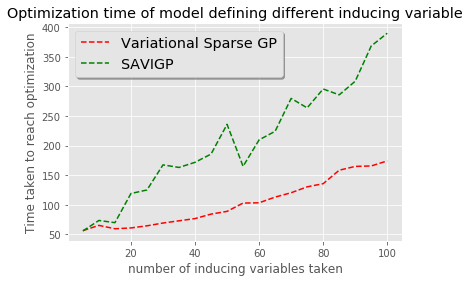

In [22]:
#Plot for optimization time
plt.title("Optimization time of model defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("Time taken to reach optimization")
plt.plot(M_change,opt_time,'r--',label="Variational Sparse GP")
plt.plot(M_change,opt_time_savigp,'g--',label = "SAVIGP")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.savefig('opt_time_boston.png', bbox_inches='tight')
plt.show()

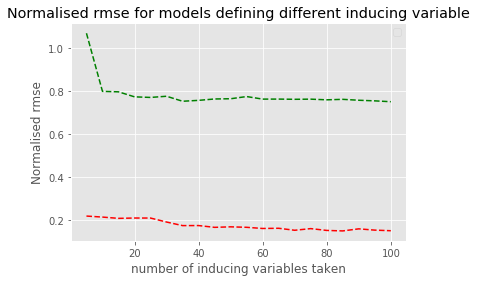

In [23]:
#Plot for nrmse
#inf replaced by 1 = indicating a bad nrmse
plt.title("Normalised rmse for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("Normalised rmse")
plt.legend()
plt.plot(M_change,nrmse,'r--',label="Variational Sparse GP")
plt.plot(M_change,nmse_savigp,'g--',label = "SAVIGP")
plt.savefig('nrmse_boston.png', bbox_inches='tight')
plt.show()

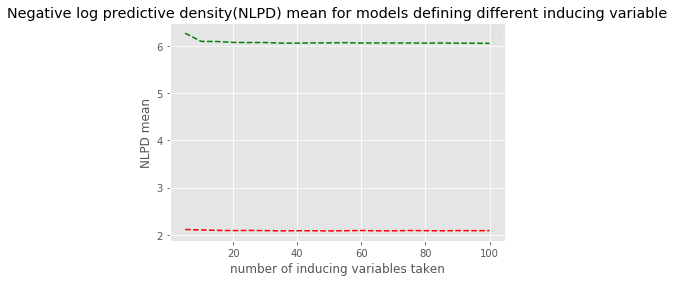

In [24]:
#Plot for nlpd mean
#inf replaced by 1 = indicating a bad nrmse
plt.title("Negative log predictive density(NLPD) mean for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("NLPD mean")
plt.legend()
plt.plot(M_change,nlpd_mean,'r--',label="Variational Sparse GP")
plt.plot(M_change,nlpd_mean_savigp,'g--',label = "SAVIGP")
plt.savefig('nlpd_mean_boston.png', bbox_inches='tight')
plt.show()

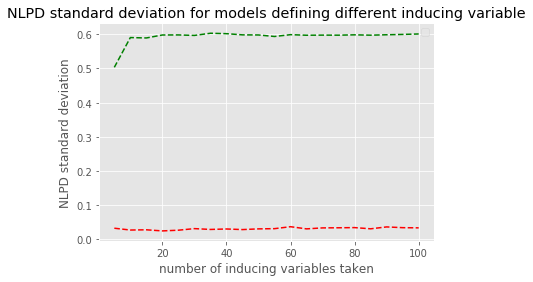

In [25]:
#Plot for nlpd std
plt.title("NLPD standard deviation for models defining different inducing variable")
plt.xlabel("number of inducing variables taken")
plt.ylabel("NLPD standard deviation")
plt.legend()
plt.plot(M_change,nlpd_std,'r--',label="Variational Sparse GP")
plt.plot(M_change,nlpd_std_savigp,'g--',label = "SAVIGP")
plt.savefig('npld_std_boston.png', bbox_inches='tight')
plt.show()

Full Model

In [28]:
def init_full():
    kern = gpflow.kernels.RBF(X_train.shape[1],1)
    m_gp = gpflow.models.VGP(X_train, Y_train, kern, gpflow.likelihoods.Gaussian())
    return m_gp

In [29]:
m_full = init_full()

In [32]:
#Define and perform optimization algorithm
def run_opt (model, iterations,var_list=None):
    if var_list is None:
        var_list = [(model.q_mu, model.q_sqrt)]
    model.q_mu.set_trainable(False)
    model.q_sqrt.set_trainable(False)
    adam = gpflow.train.AdamOptimizer().make_optimize_action(model)
    model.q_mu.set_trainable(True)
    model.q_sqrt.set_trainable(True)
    natgrad=gpflow.training.NatGradOptimizer(1).make_optimize_action(model,var_list = var_list)
    logger = Logger(model)
    actions = [adam,natgrad,logger]
    loop = gpflow.actions.Loop(actions, stop=iterations)()
    model.anchor(model.enquire_session())
    return logger

logger1 = run_opt(m_full, gpflow.test_util.notebook_niter(20000), var_list=[(m.q_mu, m.q_sqrt)])

InvalidArgumentError: Cholesky decomposition was not successful. The input might not be valid.
	 [[Node: NatGradOptimizer_22/Cholesky_1 = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/device:CPU:0"](NatGradOptimizer_22/mul_6)]]

Caused by op 'NatGradOptimizer_22/Cholesky_1', defined at:
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Applications/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Applications/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-0bb3d1decdab>", line 17, in <module>
    logger1 = run_opt(m_full, gpflow.test_util.notebook_niter(20000), var_list=[(m.q_mu, m.q_sqrt)])
  File "<ipython-input-32-0bb3d1decdab>", line 10, in run_opt
    natgrad=gpflow.training.NatGradOptimizer(1).make_optimize_action(model,var_list = var_list)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 135, in make_optimize_action
    optimizer_tensor = self.make_optimize_tensor(model, session=session, var_list=var_list)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 103, in make_optimize_tensor
    return self._build_natgrad_step_ops(model, *var_list)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 170, in _build_natgrad_step_ops
    ops.append(self._build_natgrad_step_op(model, q_mu, q_sqrt, xi_transform))
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 226, in _build_natgrad_step_op
    mean_new, varsqrt_new = xi_transform.xi_to_meanvarsqrt(*xis_new)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 296, in xi_to_meanvarsqrt
    return natural_to_meanvarsqrt(xi_1, xi_2)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 340, in wrapper
    A_dn1, B_dnn = method(a_dn1, b_dnn)
  File "/Applications/anaconda3/lib/python3.6/site-packages/gpflow/training/natgrad_optimizer.py", line 349, in natural_to_meanvarsqrt
    var_sqrt_inv = tf.cholesky(-2 * nat_2)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 412, in cholesky
    "Cholesky", input=input, name=name)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cholesky decomposition was not successful. The input might not be valid.
	 [[Node: NatGradOptimizer_22/Cholesky_1 = Cholesky[T=DT_DOUBLE, _device="/job:localhost/replica:0/task:0/device:CPU:0"](NatGradOptimizer_22/mul_6)]]


In [ ]:
#Plotting the learning process
plt.plot(-np.array(logger_full.logf))
plt.xlabel('iteration')
plt.ylabel('ELBO')

In [ ]:
#NRMSE
rmse = np.sqrt(mean_squared_error(Y_test,m_full.predict_y(X_test)[0]))
rmse/(m_full.predict_y(X_test)[0].max()-m_full.predict_y(X_test)[0].min())

In [ ]:
#mean NLPD
-m.predict_density(X_test,m_full.predict_y(X_test)[0]).mean()

In [ ]:
#standard deviation of nlpd
np.std(m_full.predict_density(X_test,m_full.predict_y(X_test)[0]))

In [33]:
nlpd_std_savigp

[0.50341592019156589,
 0.59045563116071087,
 0.58930092910298226,
 0.59801415060822682,
 0.59817949832211714,
 0.59671206758545414,
 0.60310371264490115,
 0.60184647923890988,
 0.59838409993678587,
 0.59805535371360941,
 0.59361836528546663,
 0.59896064081417855,
 0.59727057550927343,
 0.59764063176776816,
 0.59745468924922052,
 0.59846079950338493,
 0.59745471300138131,
 0.5986584284229679,
 0.5996593403382483,
 0.60097848143604382]